<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realización de esta práctica tendréis que utilizar la clase de grafos NetworkX y <b>NO</b> la clase `Graph` que implementasteis en la Práctica 0. Hay casos muy concretos que no contemplan los tests y podría hacer que vuestros algoritmos no funcionen correctamente. NetworkX tiene una interfaz muy similar a la librería <i>Graph</i> que implementasteis la semana pasada. Para más información podéis consultar la documentación de la librería <a href="https://networkx.github.io/documentation/latest/reference/introduction.html">aquí.</a>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
      Dado un grafo conexo y no dirigido, un arbol recubridor (ST por sus siglas en inglés, <i>spanning tree</i>) de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al ST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo (un árbol por cada componente conexa del grafo).
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [352]:
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
    Returns:
        tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """

" Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.\nArgs:\n    G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. \n                  Las aristas tienen el atributo 'weight' que indica su peso.\nReturns:\n    tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.\n    weight (float/int): El peso total del grafo tree.\n"

In [145]:
# Imports
import networkx as nx
print(nx.__version__)

2.5


In [146]:
# Esta funcion devuelve a que conjunto pertenece cada nodo, cada conjunto es diferenciado por un root diferente

def find(actual,prev):
    if actual != prev[actual]:
        return find(prev[actual], prev)
    else:
        return actual

In [147]:
# La implementación de union, la he hecho utilizando rank, así en el peor caso seria 0(log(n)), sin este, en el peor caso
# nos podria salir una linked list, y seria complejidad O(N).

def union(x,y,prev,rank):
    # Primero encontramos el root de los dos nodos
    root1 = find(x,prev)
    root2 = find(y,prev)
    
    # En caso que el rank del primero sea mayor, asignamos como root del 2, el root del 1 (los unimos)
    if rank[root1] > rank[root2]:
        prev[root2] = root1
        
    # En caso contrario...
    elif rank[root2] > rank[root1]:
        prev[root1] = root2
        
    # Finalmente si tienen el mismo rank, es indiferente cual unamos a cual, yo por ejemplo asigno como root del 1, el del 2
    # pero en este caso sumamos 1 a el rank del 2 
    else:
        prev[root1] = root2
        rank[root2] += 1

In [148]:
# Para completar el algoritmo de kruskal, he implementado la estructura de datos find/union, que nos permitira tanto unir 
# los diferentes conjuntos de nodos y aristas, como buscar a que conjunto pertenecen estos.

def kruskal(G):
    tree = nx.Graph()
    total_weight = 0  
    aristas = []
    visited = []
    prev = []
    rank = []
    
    # Primero de todo, ordenamos las listas en funcion de su peso, y la añado a una tupla (arista, peso)
    for x in G.edges():
        aristas.append(tuple((x, G.edges()[x])))
    aristas_ordenadas = sorted(aristas, key = lambda x: x[1]['weight'])
       
    # Aqui formo cada nodo como un conjunto independientey le añado rank (que nos ayudara a la hora de unir conjuntos)
    for nodes in range(len(G.nodes())):
        prev.append(nodes)
        rank.append(0)
        
    # Como kruskal indica, cuando el numero de aristas sea = al numero de nodos -1, tendremos nuestro MST
    while len(tree.edges()) != len(G.nodes())- 1:
        # la variable actual almacena una tupla (arista,{'weight', peso de la arista})        
        actual = aristas_ordenadas.pop(0)
        
        # Si la arista no forma un ciclo, añadimos la arista al arbol, unimos los conjuntos y sumamos el peso
        if find(actual[0][0],prev) != find(actual[0][1],prev):
            union(find(actual[0][0],prev),find(actual[0][1],prev),prev,rank) 
            tree.add_edge(actual[0][0],actual[0][1])
            total_weight += actual[1]['weight']

    return tree, total_weight


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [149]:
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """

" Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.\nArgs:\n    G (nx.Graph): El grafo sobre el que queremos obtener el MST. \n                  Las aristas tienen el atributo 'weight' que indica su peso.\n    origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.\n    infinity (float): Opcional, valor para inicializar las distancias.\nReturns:\n    tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.\n    weight (float/int): El peso total del grafo tree.\n"

In [150]:
# Import de librerias, para este algortimo, utilizare una priority queue para devolver la arista menos pesada
# la libreria random, sirve unicamente para escoger un nodo al azar con el que empezae
import heapq,random

def prim(G,origen=None,infinity=float('inf')):
    tree = nx.Graph()
    total_weight = 0
    unvisited = []
    
    # Definimos un set de nodos y el nodo con el que empezaremos
    nodes = set(list(G.nodes))
    origen = random.choice(list(G.nodes))
    nodes.remove(origen)
    
    # En la lista unvisited añadiremos una tupla (peso, (nodo de donde venimos, vecino))
    for x in G.neighbors(origen):     
        unvisited.append((G.edges[origen, x]['weight'],(origen,x)))
    heapq.heapify(unvisited)
  

    # Mientras no hayamos visitado todos los nodos...
    while len(nodes) != 0:
       
        # heappop nos devuelve la tupla de unvisited, con el peso mas pequeño, en arista se encuentra la tupla(nodo1, nodo2)
        weight, arista = heapq.heappop(unvisited)
                
        # Si el primero no se encuentra en la set de nodos, añadimos la arista, lo quitamos del set, sumamos el peso
        # y finalmente, añadimos la tupla ((peso, (nodo de donde venimos, vecino))), a unvisited
        if arista[0] in nodes:
            tree.add_edge(arista[0], arista[1])
            total_weight += weight  
            nodes.discard(arista[0])                
            for x in G.neighbors(arista[0]):
                heapq.heappush(unvisited, (G.edges[arista[0], x]['weight'], (arista[0], x)))
       
        # Lo mismo que en el anterior condicional, pero esta vez con el segundo nodo
        if arista[1] in nodes:
            tree.add_edge(arista[0], arista[1])
            total_weight += weight      
            nodes.discard(arista[1])                                
            for x in G.neighbors(arista[1]):
                heapq.heappush(unvisited, (G.edges[arista[1], x]['weight'], (arista[1], x)))
    
    return tree, total_weight

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


TOTAL MST WEIGHT
NX MST  15 [(0, 4), (1, 2), (2, 3), (3, 4)]
Kruskal 15 [(0, 4), (2, 1), (2, 3), (4, 3)]
Prim    15 [(4, 0), (1, 2), (2, 3), (3, 4)]


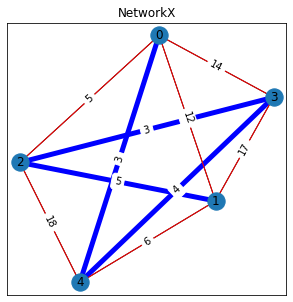

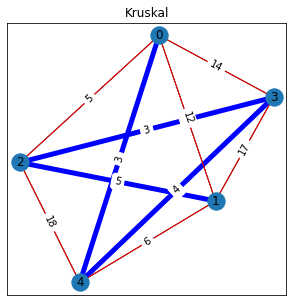

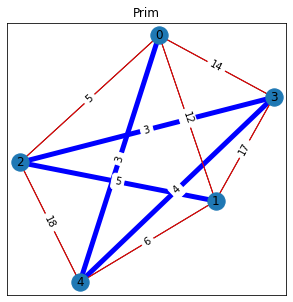

In [160]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

# Run test and remember that multiple MST with the same total weight are possible
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

Las principales diferencias entre los dos, es que uno es mas complejo que otro (en la siguiente pregunta analizare la complejidad), también utilizamos diferentes estructuras de datos para implementar los diferentes algoritmos.

En caso que tengamos un grafo muy denso, con un gran numero de aristas, Prim seria de mas útilidad que Kruskal, en cambio si tenemos un grafo menos denso, en el mejor caso con las aristas ordenadas, Kruskal seria mejor.

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

Para la implementación de Kruskal he utilizado la estructura Union-Find, para encontrar los diferentes conjuntos y unirlos, como si fueran piezas de lego.
Para la implementación de Prim, he utilizado una priority queue (heapq)
Referente a la complejidad:
Prim tiene complejidad: O(n^2)
Kruskal tiene complejidad: O(n*log(n))


In [ ]:
# EXTRA: version de Prim que implemente anteriormente, pero no me acabo de convencer, así que la hice de nuevo, funciona correctamente
# pero el codigo no es muy limpio y es un tanto mas complejo de lo correcto

# lo dejo aquí por si te aburres y te apetece verlo, o para tenerlo de recuerdo para mí :)

import random
def prim(G,origen=None,infinity=float('inf')):
    tree = nx.Graph()
    aristas = []
    visited = []
    distancies = {}
    total_weight = 0    
    
    # cojemos un nodo aleatorio para empezar, y creamos una lista con todas las aristas
    origen = random.choice(list(G.nodes()))
    aristas = list(G.edges(origen))
    
    # Ponemos todas las distancias de los nodos a infinito(menos la de origen que la ponemos a 0)
    for x in G.nodes():
        distancies[x] = infinity
    distancies[origen] = 0    
    
    # Cuando hayamos visitado todos los nodos, acabara el bucle
    while len(visited) < len(G.nodes()):      
        
        # Añadimos la arista con menor peso a la variable actual, y quitamos esa arista de la lista de aristas 
        actual = minDist(aristas)
        aristas.remove(actual)
        # En caso que estemos en la primera iteración, añadimos el nodo origen a la lista de visitados
        if len(visited)== 0:
            visited.append(actual[0])
        
        # En caso que el segundo nodo de la arista no lo hayamos visitado, lo añadimos a visitados, sumamos el peso,
        # añadimos la arista al arbol, y finalmente actualizamos distancias, y añadimos las aristas que conectan los vecinos
        # a la lista de aristas
        if actual[1] not in visited: 
            visited.append(actual[1])
            tree.add_edge(actual[0], actual[1])
            total_weight += G.edges()[actual[0], actual[1]]['weight']
            
            for x in list(G.neighbors(actual[1])):
                if G.edges()[actual[1], x]['weight'] < distancies[x]:
                    distancies[x] = G.edges()[actual[1],x]['weight']
                    for y in list(G.edges(actual[1])):
                        if y not in aristas:
                            aristas.append(y)
                    # Esta linea la hago para eliminar la arista repetida de la cual venimos es decir, si venimos
                    # de la arista (2,1), que elimine la (1,2), ya que son la misma
                    aristas.remove(tuple((actual[1],actual[0])))
    
    return tree, total_weight

In [ ]:
# Funcion auxiliar que utilizo para ordenar las aristas por peso, y devolver aquella que tiene el menor peso
def minDist(aristas):
    actual = sorted(aristas, key = lambda x : G.edges()[x[0], x[1]]['weight'])    
    return actual[0]

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
Es <b>imperativo <font size=3.5 color="#FF0000">☠☠☠ respetar las cabeceras de las funciones y estructura del return ☠☠☠</font></b> que se indiquen en el enunciado. Pese a que leemos y corregimos vuestros códigos en detalle, empleamos correctores automáticos para guiar y agilizar el proceso. De esta manera, si se pide que la función tenga la siguiente estructura:

<code>def funcion_ejercicio(lista1, indice1):
    ... # implementación de la solución
    return elemento_resultado </code>
    
En el notebook deberá existir una y solo una función con el nombre <i>funcion_ejercicio</i> que reciba exactamente los parámetros indicados y devuelva las variables en el formato y con el tipo que se requiera en el eunciado. En todos los enunciados se explicitará qué tipo de datos han de pasarse a las funciones y devolverse. <b> La no adherencia al formato de las funciones <font size=3.5 color="#FF0000">☠☠☠ conllevará a una puntuación nula sobre ese ejercicio. ☠☠☠</font> </b>
</div>

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
La entrega se podrá realizar en el campus virtual hasta el día <b>22 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar únicamente este notebook con el nombre:
</p>
<p>
    <code>[grupo]_[apellido]_[nombre]_Greedy.ipynb</code>


</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico Estándar</i> que asiste al <i>grupo Z</i> de clases presenciales*, el nombre del archivo debería ser:
</p>
<p>
<code>Z_Generico_Nombre_Greedy.ipynb</code>
    <br>
Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_Greedy.zip</li>
    
<li>ZX_Generico_Nombre_Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_Greedy.rar</li>

<li>Classes.ipynb</li>
<li> ... literalmente cualquier otra cosa. </li>
</ul>
</p>
<p>


Es fundamental que el código esté bién comentado. Además, es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y una sola con el nombre <i>prim</i>. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre.
<p>
<b> <font size=3.5 color="#FF0000">☠☠☠ No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica. ☠☠☠</font></b>
</p>
</p>
*: Los posibles grupos de las clases presenciales son: A, B, C, D, F.
</div>